<a href="https://colab.research.google.com/github/Andrvz/Pos_Graduacao_MVP/blob/main/MVP_2_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados de Vendas por E-comerce da Olist
#### Desenvolvido por André Vaz em Julho de 2023
\\


**Disciplina:** Machine Learning & Analytics \\
**Pós-Graduação:** Ciência de Dados e Analytics \\
**Universidade:** PUC-Rio


________________________________________________________________________________
## Apresentação do Projeto

- A Olist é uma empresa brasileira de e-commerce que oferece uma plataforma de vendas para lojas de todos os portes. O dataset divulgado de forma pública pela mesma contém um conjunto de tabelas que reunem informações de seus clientes, vendas, pedidos, produtos e vendedores. Abordando o período entre os anos de 2016 à 2018, o dataset da Olist apresenta mais de 100.000 pedidos realizados por cerca de 32.000 clientes em vendas ditribuídas pelas 5 regiões do Brasil.

- O projeto abordará o processo de extração, tratamento e exploração do dataset, possibilitando assim o desenvolvimento de estudos que utilizem técnicas de Machine Learning, como a análise de segmentação de clientes com base na análise RFM.

- Ao aplicar o conceito de RFM (recência, frequência e valor monetário) na base de dados da Olist, será possível identificar padrões de comportamento dos clientes, classificando-os em diferentes segmentos com base na recência de suas compras, frequência de interação com a plataforma e o valor total gasto em produtos e serviços oferecidos pela empresa.


*   Dataset **Customers**: dados sobre clientes.
> **customer_id**: identificação do cliente por pedido. \
> **customer_unique_id**: identificação única do cliente. \
> **customer_zip_code_prefix**: código postal do cliente. \
> **customer_city**: cidade onde o cliente reside. \
> **customer_state**: estado onde o cliente reside.

*   Dataset **Orders**: dados sobre vendas.
> **order_id**: identificação única do pedido. \
> **customer_id**: identificação única do cliente que fez o pedido. \
> **order_status**: status do pedido. \
> **order_purchase_timestamp**: data e hora da compra. \
> **order_approved_at**: data e hora em que o pagamento foi aprovado. \
> **order_delivered_carrier_date**: data em que o pedido foi entregue à transportadora. \
> **order_delivered_customer_date**: data em que o pedido foi entregue ao cliente. \
> **order_estimated_delivery_date**: data estimada de entrega.

*   Dataset **Order Items**: dados sobre pedidos por vendas.
> **order_id**: identificação única do pedido. \
> **order_item_id**: identificação única do item do pedido. \
> **product_id**: identificação única do produto. \
> **seller_id**: identificação única do vendedor. \
> **shipping_limit_date**: data limite para o envio do produto. \
> **price**: preço unitário do produto. \
> **freight_value**: valor do frete.

*   Dataset **Order Payments**: dados sobre pagamentos por vendas.
> **order_id**: identificação única do pedido. \
> **payment_sequential**: número de sequência do pagamento em um determinado pedido. \
> **payment_type**: tipo de pagamento utilizado. \
> **payment_installments**: número de parcelas em que o pagamento foi dividido. \
> **payment_value**: valor total pago.

*   Dataset **Order Reviews**: dados sobre avaliações por vendas.
> **review_id**: identificação única da avaliação. \
> **order_id**: identificação única do pedido. \
> **review_score**: pontuação da avaliação (0 a 5). \
> **review_comment_title**: título presente na mensagem de avaliação.\
> **review_comment_message**: mensagem de avaliação.\
> **review_creation_date**: data de criação da avaliação. \
> **review_answer_timestamp**: data em que a resposta à avaliação foi enviada.

*   Dataset **Products**: dados sobre produtos.
> **product_id**: identificação única do produto. \
> **product_category_name**: categoria do produto. \
> **product_name_lenght**: comprimento em caracteres do nome do produto. \
> **product_description_lenght**: comprimento da descrição do produto. \
> **product_photos_qty**: quantidade de fotos do produto. \
> **product_weight_g**: peso do produto em gramas. \
> **product_length_cm**: comprimento do produto em centímetros. \
> **product_height_cm**: altura do produto em centímetros. \
> **product_width_cm**: largura do produto em centímetros.

*   Dataset **Sellers**: dados sobre vendedores.
> **seller_id**: identificação única do vendedor. \
> **seller_zip_code_prefix**: código postal do vendedor. \
> **seller_city**: cidade onde o vendedor está localizado. \
> **seller_state**: estado onde o vendedor está localizado.

________________________________________________________________________________

## Códigos Python

In [58]:
#@title 1.1 - Instalações Iniciais

!pip install pandas numpy                                                     # Instalando bibliotecas básicas para cicência de dados
!pip install holoviews seaborn bokeh matplotlib                               # Instalando bibliotecas de visualização
!pip install ipywidgets                                                       # Instalando biblioteca para uso de widgets no notebook
!jupyter nbextension enable --py widgetsnbextension                           # Instalando extensão para uso de widgets no notebook
!pip install summarytools                                                     # Instalando biblioteca para widget de resumo de dados

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [59]:
#@title 1.2 - Importações

# Importações gerais
import os
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
from datetime import date, datetime, timedelta
from summarytools import dfSummary
from openpyxl import Workbook

# Importações de bibliotecas de visualização
import holoviews as hv
from holoviews import opts
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from bokeh.models.tools import HoverTool
from ipywidgets import widgets
from IPython.display import display
import missingno as ms # para tratamento de missings

# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

In [60]:
#@title 1.3 - Métodos utilizados para ETL
class ETL:
    def __init__(self, tipo):
        self.tipo = tipo

        self.dataset_raw = {}
        self.resumo_tabelas_raw = None
        self.resumo_colunas_raw = None

        self.dataset = {}
        self.resumo_tabelas = None
        self.resumo_colunas = None

        self.pipeline()

    def carregar_dados(self):

        self.dataset_raw = {'customer': pd.read_csv(
            'https://raw.githubusercontent.com/Andrvz/mvp_sprint_1/main/Dataset/olist_customers_dataset.csv'),
            'orders': pd.read_csv(
                'https://raw.githubusercontent.com/Andrvz/mvp_sprint_1/main/Dataset/olist_orders_dataset.csv'),
            'order_items': pd.read_csv(
                'https://raw.githubusercontent.com/Andrvz/mvp_sprint_1/main/Dataset/olist_order_items_dataset.csv'),
            'order_payments': pd.read_csv(
                'https://raw.githubusercontent.com/Andrvz/mvp_sprint_1/main/Dataset/olist_order_payments_dataset.csv'),
            'order_reviews': pd.read_csv(
                'https://raw.githubusercontent.com/Andrvz/mvp_sprint_1/main/Dataset/olist_order_reviews_dataset.csv'),
            'products': pd.read_csv(
                'https://raw.githubusercontent.com/Andrvz/mvp_sprint_1/main/Dataset/olist_products_dataset.csv'),
            'sellers': pd.read_csv(
                'https://raw.githubusercontent.com/Andrvz/mvp_sprint_1/main/Dataset/olist_sellers_dataset.csv')}

    def tratar_dados(self):
        self.dataset = {}

        for data in self.dataset_raw.keys():
            if data == 'customer':
                df = self.dataset_raw[f'{data}']
                df = df.astype({'customer_id': 'object',
                                'customer_unique_id': 'object',
                                'customer_zip_code_prefix': 'int',
                                'customer_city': 'category',
                                'customer_state': 'category'})
                df.dropna(inplace=True)
                df.drop(columns=[], inplace=True)
                self.dataset[f'{data}'] = df
                del df
            if data == 'order_items':
                df = self.dataset_raw[f'{data}']
                df = df.astype({'order_id': 'object',
                                'order_item_id': 'int',
                                'product_id': 'object',
                                'seller_id': 'object',
                                'shipping_limit_date': 'datetime64[ns]',
                                'price': 'float',
                                'freight_value': 'float'})

                df.dropna(inplace=True)
                df.drop(columns=[], inplace=True)
                self.dataset[f'{data}'] = df
                del df
            if data == 'orders':
                df = self.dataset_raw[f'{data}']

                df = df.assign(
                    purchase_date=pd.to_datetime(df['order_purchase_timestamp']).dt.date,
                    purchase_year=pd.to_datetime(df['order_purchase_timestamp']).dt.year,
                    purchase_month=pd.to_datetime(df['order_purchase_timestamp']).dt.month,
                    purchase_day=pd.to_datetime(df['order_purchase_timestamp']).dt.day_name(),
                    purchase_hour=pd.to_datetime(df['order_purchase_timestamp']).dt.hour)

                def time_period(x):
                    if x >= 5 and x < 12:
                        return "Morning"
                    elif x >= 12 and x < 17:
                        return "Afternoon"
                    elif x >= 17 and x < 21:
                        return "Evening"
                    else:
                        return "Night"

                df["purchase_time"] = df["purchase_hour"].apply(time_period)

                df = df.astype({'order_id': 'object',
                                'customer_id': 'object',
                                'order_status': 'category',
                                'order_purchase_timestamp': 'datetime64[ns]',
                                'order_approved_at': 'datetime64[ns]',
                                'order_delivered_carrier_date': 'datetime64[ns]',
                                'order_delivered_customer_date': 'datetime64[ns]',
                                'order_estimated_delivery_date': 'datetime64[ns]'})

                df.dropna(inplace=True)
                df.drop(columns=[], inplace=True)
                self.dataset[f'{data}'] = df
                del df
            if data == 'order_payments':
                df = self.dataset_raw[f'{data}']
                df = df.astype({'order_id': 'object',
                                'payment_sequential': 'int',
                                'payment_type': 'category',
                                'payment_installments': 'int',
                                'payment_value': 'float'})

                df.dropna(inplace=True)
                df.drop(columns=[], inplace=True)
                self.dataset[f'{data}'] = df
                del df
            if data == 'order_reviews':
                df = self.dataset_raw[f'{data}']
                df = df.astype({'review_id':'object',
                                'order_id':'object',
                                 'review_score':'int',
                                'review_creation_date':'datetime64[ns]',
                                'review_answer_timestamp':'datetime64[ns]'})

                df.dropna(inplace=True)
                df.drop(columns=[], inplace=True)
                self.dataset[f'{data}'] = df
                del df
            if data == 'products':
                df = self.dataset_raw[f'{data}']
                df['product_width_cm'] = df['product_width_cm'].fillna(0)
                df['product_height_cm'] = df['product_height_cm'].fillna(0)
                df['product_length_cm'] = df['product_length_cm'].fillna(0)
                df['product_weight_g'] = df['product_weight_g'].fillna(0)
                df['product_name_lenght'] = df['product_name_lenght'].fillna(0)
                df['product_description_lenght'] = df['product_description_lenght'].fillna(0)
                df['product_photos_qty'] = df['product_photos_qty'].fillna(0)
                df['product_category_name'] = df['product_category_name'].fillna('Sem Categoria')

                df = df.astype({'product_id': 'object',
                                'product_category_name': 'category',
                                'product_name_lenght': 'float',
                                'product_description_lenght': 'float',
                                'product_photos_qty': 'float',
                                'product_weight_g': 'float',
                                'product_length_cm': 'float',
                                'product_height_cm': 'float',
                                'product_width_cm': 'float'})

                df.dropna(inplace=True)
                df.drop(columns=[], inplace=True)
                self.dataset[f'{data}'] = df
                del df
            if data == 'sellers':
                df = self.dataset_raw[f'{data}']
                df = df.astype({'seller_id': 'object',
                                'seller_zip_code_prefix': 'int',
                                'seller_city': 'category',
                                'seller_state': 'category'})

                df.dropna(inplace=True)
                df.drop(columns=[], inplace=True)
                self.dataset[f'{data}'] = df
                del df


    @staticmethod
    def tabela_consolidada(dict_dataset):
        df = dict_dataset['order_items']
        df = pd.merge(df, dict_dataset['products'],on='product_id')
        df = pd.merge(df, dict_dataset['sellers'],on='seller_id')
        df = pd.merge(df, dict_dataset['orders'],on='order_id')
        df = pd.merge(df, dict_dataset['customer'],on='customer_id')
        df = pd.merge(df, dict_dataset['order_reviews'],on='order_id')
        df = pd.merge(df, dict_dataset['order_payments'],on='order_id')
        return df


    @staticmethod
    def resumo_dados(dicionario_tabelas):
        tabelas = []
        titles = []
        resumo_colunas = pd.DataFrame({},)
        for nome_tabela in dicionario_tabelas:
            tabelas.append(dicionario_tabelas[nome_tabela])
            titles.append(nome_tabela)
            df = HUB.resumo_dados(dicionario_tabelas[nome_tabela])[0]
            df["Tabela"] = df.apply(lambda row: nome_tabela, axis=1)
            resumo_colunas = pd.concat([resumo_colunas, df])

        resumo_tabelas = pd.DataFrame({},)
        resumo_tabelas['datasets']= titles
        resumo_tabelas['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in tabelas]
        resumo_tabelas['Linhas']= [data.shape[0] for data in tabelas]
        resumo_tabelas['Colunas']= [data.shape[1] for data in tabelas]
        resumo_tabelas['Duplicadas']= [len(data[data.duplicated()]) for data in tabelas]
        resumo_tabelas['Linhas Nulas']= [data.isnull().sum().sum() for data in tabelas]
        resumo_tabelas['Colunas Nulas'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in tabelas]
        resumo_tabelas.style.background_gradient(cmap='YlGnBu')
        return resumo_tabelas, resumo_colunas

    def pipeline(self):
        path = None
        if self.tipo == "Colab":
            print("Ambiente Python: Google Colab")
            path = "/data/"

        if self.tipo == "DataSpell":
            print("Ambiente Python: Dataspell")
            path = "data/"

        self.carregar_dados()
        self.tratar_dados()
        self.dataset_raw['consolidado'] = ETL.tabela_consolidada(self.dataset_raw)
        self.resumo_tabelas_raw, self.resumo_colunas_raw = ETL.resumo_dados(self.dataset_raw)
        self.dataset['consolidado'] = ETL.tabela_consolidada(self.dataset)
        self.resumo_tabelas, self.resumo_colunas = ETL.resumo_dados(self.dataset)

        if path != None:
            ETL.salvar_dados_csv(self.dataset_raw, path, tipo="raw")
            ETL.salvar_dados_csv(self.dataset, path, tipo="processed")

    @staticmethod
    def salvar_dados_csv(data, path, tipo=None):
        # Create a directory to store the CSV files
        print("Datasets salvos em " + path + tipo)
        if not os.path.exists(path + tipo):
            os.makedirs(path + tipo)

        for nome_aba, df in data.items():
            # Convert the DataFrame to a CSV file
            filename = f'{path + tipo}/{nome_aba}.csv'
            df.to_csv(filename, index=False)


In [61]:
#@title 1.4 - Métodos utilizados para Snippets
class HUB:
  @staticmethod
  def hist(dataset):
    dataset_dict = {}
    for n in dataset.keys():
        dataset_dict[n] = dataset[n].columns

    def dados_graficos(df, col, datatype):
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

        if datatype == 'numeric':
            sns.boxplot(x=col, data=df, ax=ax1, orient='v', color='darkslategrey')
            sns.distplot(df[col], ax=ax2, color='teal').set_title(f'Histograma')
            ax1.set_title('Boxplot', fontsize=14, color='black')
            ax1.set_xlabel('Box', fontsize=14, color='black')
            ax1.set_ylabel(col + ' Values', fontsize=14, color='black')

        plt.show()

    def update_dropdown(*args):
        selected_key = dropdown_key.value
        selected_type = dropdown_type.value

        # Map the data type strings to corresponding data types
        if selected_type == 'numeric':
            dropdown_value.options = dataset[selected_key].select_dtypes(include=np.number).columns.tolist()


    def select(change):
        output.clear_output()
        if change.new:
            selected_type = dropdown_type.value
            with output:
               dados_graficos(dataset[dropdown_key.value], col=change.new, datatype=selected_type)

    output = widgets.Output()

    dropdown_key = widgets.Dropdown(options=list(dataset.keys()), description='Tabela:')
    dropdown_type = widgets.Dropdown(options=['numeric'], description='Tipo:')
    dropdown_value = widgets.Dropdown(description='Coluna:')

    dropdown_key.observe(update_dropdown, 'value')
    dropdown_value.observe(select, names="value")
    dropdown_type.observe(update_dropdown, 'value')

    display(dropdown_key, dropdown_type, dropdown_value)
    display(output)

  @staticmethod
  def relatorio_tabelas(df, title):
    null_counts = df.isnull().sum()
    null_counts = null_counts[null_counts > 0]
    null_counts = null_counts.sort_values(ascending=False)

    print(f"""
Tabela: {title}
Linhas: {df.shape[0]}
Colunas: {df.shape[1]}
Total de nulos:  {df.isnull().sum().sum()}
----------------------------------------------
Colunas nulas:
{null_counts}
  """)


  @staticmethod
  def resumo_dados(data):
      """
      :param data: pandas dataframe.
      :return: pandas dataframe com tipo, quantidade, valores distintos, valores nulos (total e porcentagem).
      """
      if isinstance(data, pd.DataFrame):
          data_info = pd.DataFrame({})
          data_info['Nulos'] = round(data.isna().sum(), 2)
          data_info['%_Nulos'] = round((data.isna().sum()) / (data.shape[0]) * 100, 1).astype(str) + '%'
          data_info['Tipo'] = data.dtypes.tolist()
          data_info['Valores_Dist'] = data.nunique().tolist()
          data_info['Itens'] = data.count()

          data_info = data_info.reindex(columns=['Tipo', 'Itens', 'Valores_Dist', 'Nulos', '%_Nulos'])
          data_info = data_info.sort_values(by='%_Nulos', ascending=False)
          return data_info, data_info.reset_index()
      if isinstance(data, dict):
          data_info_dict = pd.DataFrame({})
          for key in data.keys():
              data_info = pd.DataFrame({})
              data_info['Nulos'] = round(key.isna().sum(), 2)
              data_info['%_Nulos'] = round((key.isna().sum()) / (key.shape[0]) * 100, 1).astype(str) + '%'
              data_info['Tipo'] = key.dtypes.tolist()
              data_info['Valores_Dist'] = key.nunique().tolist()
              data_info['Itens'] = key.count()
              data_info['Duplicados'] = data[key].duplicated().sum()

              data_info = data_info.reindex(columns=['Tipo', 'Itens', 'Valores_Dist', 'Nulos', '%_Nulos','Duplicados'])
              data_info_dict = pd.concat([data_info_dict, data_info])
              return data_info_dict, data_info_dict.reset_index()
      if not isinstance(data, (pd.DataFrame, dict)):
          print("Insira um argumento do tipo 'pd.DataFrame' ou 'dict'")

  @staticmethod
  def resumo_dados_categoricos(data):
      """
      :param data: pd.DataFrame ou pd.Series
      :return: pandas dataframe com frequência e proporção de valores distintos.
      """
      if isinstance(data, pd.DataFrame):
          columns = data.select_dtypes(include=['category']).columns.tolist()
          data_info = pd.DataFrame()
          data_info['Frequência'] = data[columns].apply(lambda x: x.value_counts()).T.stack()
          data_info['Proporção'] = data[columns].apply(
              lambda x: x.value_counts(normalize=True).mul(100).round(1).astype(str) + '%').T.stack()
          return data_info, data_info.reset_index()
      if isinstance(data, pd.Series):
          data_info = pd.DataFrame()
          data_info['Frequência'] = data.value_counts().T
          data_info['Proporção'] = (data.value_counts(normalize=True).mul(100).round(1).astype(str) + '%').T
          return data_info, data_info.reset_index()
      if not isinstance(data, (pd.DataFrame, pd.Series)):
          print("Insira um argumento do tipo 'pd.DataFrame' ou 'pd.Series'")




In [67]:
#@title 1.5 - Métodos utilizados para Widgets
class VIZ:
    @staticmethod
    def widget_from_dict(dict_df):
        from ipywidgets import widgets
        from IPython.display import display

        dropdown = widgets.ToggleButtons(
            options=list(dict_df.keys()),
            description='Dataset:',
            disabled=False,
            button_style='success')#,
            # tooltips=['Dataset de clientes da Olist.', 'Dataset de geolozalização dos clientes da Olist.',
                      # 'Dataset das vendas feitas pela Olist.', 'Dataset dos itens vendidos por venda feita pela Olist.',
                      # 'Dataset dos métodos de pagamento das vendas feitas pela Olist.','Dataset de avaliações das vendas feitas pela Olist.',
                      # 'Dataset de produtos vendidos pela Olist.', 'Dataset de vendedores parceiros da Olist.'])

        output_1 = widgets.Output()
        output_2 = widgets.Output()
        output_3 = widgets.Output()
        output_4 = widgets.Output()
        output_5 = widgets.Output()

        tab = widgets.Tab([output_1, output_2,output_3, output_4, output_5])
        tab.set_title(0, 'Colunas')
        tab.set_title(1, 'Amostra de 10 linhas')
        tab.set_title(2, 'Describe')
        tab.set_title(3, 'Resumo da Tabela')
        tab.set_title(4, 'Colunas Categóricas')

        def select(change):
            output_1.clear_output()
            output_2.clear_output()
            output_3.clear_output()
            output_4.clear_output()
            output_5.clear_output()

            if change.new in list(dict_df.keys()):
                with output_1:
                    display(HUB.resumo_dados(dict_df[change.new])[0])
                with output_2:
                    display(dict_df[change.new].sample(10))
                with output_3:
                    display(dict_df[change.new].describe())
                with output_4:
                    display(HUB.relatorio_tabelas(dict_df[change.new],change.new)[0])
                with output_5:
                    display(HUB.resumo_dados_categoricos(dict_df[change.new])[0])

        dropdown.observe(select, names="value")
        return display(dropdown, tab)

    @staticmethod
    def widget_from_df(wid_data):

        output_1 = widgets.Output()
        output_2 = widgets.Output()
        output_3 = widgets.Output()
        output_4 = widgets.Output()

        tab = widgets.Tab([output_1, output_2, output_3, output_4])
        tab.set_title(0, 'Informações')
        tab.set_title(1, 'Primeiras 5 linhas')
        tab.set_title(2, 'Últimas 5 linhas')
        tab.set_title(3, 'Coluna Categóricas')

        with output_1:
            display(HUB.resumo_dados(wid_data)[0])
        with output_2:
            display(wid_data.head(5))
        with output_3:
            display(wid_data.tail(5))
        with output_4:
            display(HUB.resumo_dados_categoricos(wid_data))

        return display(tab)

    @staticmethod
    def widget_tabela(dataset_dict):
      def execute_function(change):
          output.clear_output()
          if change.new:
              selected_key = dropdown_key.value
              with output:
                  return print(dataset_dict[selected_key])


      output = widgets.Output()

      dropdown_key = widgets.Dropdown(options=list(dataset_dict.keys()), description='Tabela:')

      dropdown_key.observe(execute_function, 'value')

      display(dropdown_key)
      display(output)

    @staticmethod
    def widget_visualizar_dataset(dict_df):
      dropdown = widgets.ToggleButtons(
      options=list(dict_df.keys()),
      description='Dataset:',
      disabled=False,
      button_style='success')

      output_1 = widgets.Output()
      output_2 = widgets.Output()
      output_3 = widgets.Output()
      output_4 = widgets.Output()
      output_5 = widgets.Output()

      tab = widgets.Tab([output_1, output_2,output_3, output_4, output_5])
      tab.set_title(0, 'Informações')
      tab.set_title(1, 'Primeiras 5 linhas')
      tab.set_title(2, 'Últimas 5 linhas')
      tab.set_title(3, 'Colunas Numéricas')
      tab.set_title(4, 'Colunas Categóricas')

      def select(change):
        output_1.clear_output()
        output_2.clear_output()
        output_3.clear_output()
        output_4.clear_output()
        output_5.clear_output()

        if change.new in list(dict_df.keys()):
          with output_1:
            display(HUB.resumo_dados(dict_df[change.new])[0])
          with output_2:
            display(dict_df[change.new].head(5))
          with output_3:
            display(dict_df[change.new].tail(5))
          with output_4:
            display(dict_df[change.new].describe())
          with output_5:
            display(HUB.resumo_dados_categoricos(dict_df[change.new])[0])

      dropdown.observe(select, names="value")
      return display(dropdown, tab)

    @staticmethod
    def relatorio_tabelas(df, title):
        null_counts = df.isnull().sum()
        null_counts = null_counts[null_counts > 0]
        null_counts = null_counts.sort_values(ascending=False)

        print(f"""
    Tabela: {title}
    Linhas: {df.shape[0]}
    Colunas: {df.shape[1]}
    Total de nulos:  {df.isnull().sum().sum()}
    ----------------------------------------------
    Colunas nulas:
    {null_counts}
    """)

    @staticmethod
    def relatorio_tabelas_consolidado(df, title):

      print(f"""

    Tabela: {title}
    Linhas: {Olist_dataset['Consolidado'].shape[0]}
    Colunas: {Olist_dataset['Consolidado'].shape[1]}
    Total de nulos:  {Olist_dataset['Consolidado'].isnull().sum().sum()}
    Duplicados:

    ----------------------------------------------
    Dia primeria venda: {Olist_dataset['Consolidado']['order_purchase_timestamp'].min()}
    Dia última venda: {Olist_dataset['Consolidado']['order_purchase_timestamp'].max()}
    """)

    @staticmethod
    def create_widgets_and_execute_function(dataset_dict):
        def execute_function(change):
            output.clear_output()
            if change.new:
                selected_key = dropdown_key.value
                with output:
                    return print(relatorio_tabelas(df=dataset_dict[selected_key], title=selected_key))


        output = widgets.Output()

        dropdown_key = widgets.Dropdown(options=list(dataset_dict.keys()), description='Tabela:')

        dropdown_key.observe(execute_function, 'value')

        display(dropdown_key)
        display(output)

    @staticmethod
    def widget_tabela(dataset_dict):
        def execute_function(change):
            output.clear_output()
            if change.new:
                selected_key = dropdown_key.value
                with output:
                    return print(dataset_dict[selected_key])


        output = widgets.Output()

        dropdown_key = widgets.Dropdown(options=list(dataset_dict.keys()), description='Tabela:')

        dropdown_key.observe(execute_function, 'value')

        display(dropdown_key)
        display(output)

In [68]:
#@title 1.6 - Métodos utilizados para Machine learning
class Machine_Learning():
  @staticmethod
  def RMF(df):
    # Tabela: recência
    present_day = df['order_purchase_timestamp'].max() + timedelta(days=2)
    recency_df= pd.DataFrame(df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
    recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
    recency_df = recency_df.sort_values(by='Recency', ascending=False)

    # Tabela: frequência
    frequency_df = pd.DataFrame(df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
    frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
    frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

    # Tabela: valor monetário
    monetary_df = df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
    monetary_df.columns = ['customer_unique_id', 'Monetary']
    monetary_df = monetary_df.sort_values(by='Monetary', ascending=False)

    # Tabela: Resumo de recência, frequência e valor monetário
    RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
    RFM_df = RF_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')
    RFM_estatistica = RFM_df.describe().T


    # Remoção de outliers
    def num_outlier(df_in, col_name):
        q1 = df_in[col_name].quantile(0.05)
        q3 = df_in[col_name].quantile(0.95)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]

    for i in ["Recency", "Frequency", "Monetary"]:
        num_outlier(RFM_df, i)

    # Remoção de outliers nos 5%
    def num_outlier(df_in, col_name):
        q1 = df_in[col_name].quantile(0.05)
        q3 = df_in[col_name].quantile(0.95)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]

    for i in ["Recency", "Frequency", "Monetary"]:
        num_outlier(RFM_df, i)

    RFM_df2= RFM_df.copy()
    RFM_df2 = RFM_df2.set_index('customer_unique_id')

    RFM_df2["recency_score"]  = pd.qcut(RFM_df2['Recency'], 5, labels=[5, 4, 3, 2, 1])
    RFM_df2["frequency_score"]= pd.qcut(RFM_df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
    RFM_df2["monetary_score"] = pd.qcut(RFM_df2['Monetary'], 5, labels=[1, 2, 3, 4, 5])
    RFM_df2['RFM_SCORE'] = RFM_df2.recency_score.astype(str)+ RFM_df2.frequency_score.astype(str) + RFM_df2.monetary_score.astype(str)

    seg_map= {
        r'111|112|121|131|141|151': 'Lost customers',
        r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
        r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
        r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
        r'331|321|312|221|213|231|241|251': 'About To Sleep',
        r'535|534|443|434|343|334|325|324': 'Need Attention',
        r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
        r'512|511|422|421|412|411|311': 'New Customers',
        r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
        r'543|444|435|355|354|345|344|335': 'Loyal',
        r'555|554|544|545|454|455|445': 'Champions'
    }


    RFM_df2['Segment'] = RFM_df2['recency_score'].astype(str) + RFM_df2['frequency_score'].astype(str) + RFM_df2['monetary_score'].astype(str)
    RFM_df2['Segment'] = RFM_df2['Segment'].replace(seg_map, regex=True)

    RFMStats = RFM_df2[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])
    RFMStats['Ratio']= (100*RFMStats['Monetary']["count"]/RFMStats['Monetary']["count"].sum()).round(2)

    RFM_df_raw = RFM_df
    RFM_df = RFM_df2
    RFM_estatistica = RFMStats


    return RFM_df_raw, RFM_df, RFM_estatistica

________________________________________________________________________________

## Extração, Tratamento e Exploração do Dataset

In [69]:
#@title Inicialização da classe Olist

# Inicializar o projeto
Olist = ETL(tipo="Colab")
Olist.resumo_tabelas_raw
# Tabelas salvas
print(f"""
- Confirmar se arquivos estão sendo salvos
""")

Ambiente Python: Google Colab
Datasets salvos em /data/raw
Datasets salvos em /data/processed

- Confirmar se arquivos estão sendo salvos



________________________________________________________________________________

### Dataset Raw

In [71]:
#@title Dataset Raw - Resumo de tabelas
VIZ.create_widgets_and_execute_function(Olist.dataset_raw)
Olist.resumo_tabelas_raw

Dropdown(description='Tabela:', options=('customer', 'orders', 'order_items', 'order_payments', 'order_reviews…

Output()

,datasets,columns,Linhas,Colunas,Duplicadas,Linhas Nulas,Colunas Nulas
0,customer,"customer_id, customer_unique_id, customer_zip_...",99441,5,0,0,
1,orders,"order_id, customer_id, order_status, order_pur...",99441,8,0,4908,"order_approved_at, order_delivered_carrier_dat..."
2,order_items,"order_id, order_item_id, product_id, seller_id...",112650,7,0,0,
3,order_payments,"order_id, payment_sequential, payment_type, pa...",103886,5,0,0,
4,order_reviews,"review_id, order_id, review_score, review_comm...",99224,7,0,145903,"review_comment_title, review_comment_message"
5,products,"product_id, product_category_name, product_nam...",32951,9,0,0,
6,sellers,"seller_id, seller_zip_code_prefix, seller_city...",3095,4,0,0,
7,consolidado,"order_id, order_item_id, product_id, seller_id...",117329,39,0,174808,"order_approved_at, order_delivered_carrier_dat..."


In [72]:
#@title Dataset Raw - Resumo de colunas
Olist.resumo_colunas_raw.query('Tabela == "consolidado"')

,Tipo,Itens,Valores_Dist,Nulos,%_Nulos,Tabela
review_comment_title,object,13892,4497,103437,88.2%,consolidado
review_comment_message,object,49679,35691,67650,57.7%,consolidado
order_delivered_customer_date,object,114858,95021,2471,2.1%,consolidado
order_delivered_carrier_date,object,116094,80449,1235,1.1%,consolidado
order_id,object,117329,97916,0,0.0%,consolidado
customer_state,object,117329,27,0,0.0%,consolidado
order_estimated_delivery_date,object,117329,449,0,0.0%,consolidado
customer_unique_id,object,117329,94720,0,0.0%,consolidado
customer_zip_code_prefix,int64,117329,14955,0,0.0%,consolidado
customer_city,object,117329,4108,0,0.0%,consolidado


In [50]:
#@title Dataset Raw - Consulta às tabelas
VIZ.widget_visualizar_dataset({key: Olist.dataset_raw[key] for key in ['customer', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products', 'sellers','consolidado']})

ToggleButtons(button_style='success', description='Dataset:', options=('customer', 'orders', 'order_items', 'o…

________________________________________________________________________________

### Dataset Tratado

In [51]:
#@title Dataset Tratado - Resumo de tabelas
create_widgets_and_execute_function(Olist.dataset)
Olist.resumo_tabelas

Dropdown(description='Tabela:', options=('customer', 'orders', 'order_items', 'order_payments', 'order_reviews…

Output()

,datasets,columns,Linhas,Colunas,Duplicadas,Linhas Nulas,Colunas Nulas
0,customer,"customer_id, customer_unique_id, customer_zip_...",99441,5,0,0,
1,orders,"order_id, customer_id, order_status, order_pur...",96461,14,0,0,
2,order_items,"order_id, order_item_id, product_id, seller_id...",112650,7,0,0,
3,order_payments,"order_id, payment_sequential, payment_type, pa...",103886,5,0,0,
4,order_reviews,"review_id, order_id, review_score, review_comm...",9839,7,0,0,
5,products,"product_id, product_category_name, product_nam...",32951,9,0,0,
6,sellers,"seller_id, seller_zip_code_prefix, seller_city...",3095,4,0,0,
7,consolidado,"order_id, order_item_id, product_id, seller_id...",11652,45,0,0,


In [ ]:
#@title Dataset Tratado - Resumo de colunas
Olist.resumo_colunas.query('Tabela == "consolidado"')

In [53]:
#@title Dataset Tratado - Consulta às tabelas
VIZ.widget_visualizar_dataset({key: Olist.dataset[key] for key in ['customer', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products', 'sellers','consolidado']})


ToggleButtons(button_style='success', description='Dataset:', options=('customer', 'orders', 'order_items', 'o…

In [54]:
#@title Dataset Tratado - Explorando colunas numéricas das tabelas com Boxplot e Histogramas
HUB.hist(Olist.dataset)

Dropdown(description='Tabela:', options=('customer', 'orders', 'order_items', 'order_payments', 'order_reviews…

Dropdown(description='Tipo:', options=('numeric',), value='numeric')

Dropdown(description='Coluna:', options=(), value=None)

Output()

________________________________________________________________________________

## Análise de RMF (Recência, Frequência e Valor Monetário)

In [74]:
Olist_Cluster_RMF = Machine_Learning.RMF(Olist.dataset['consolidado'][['order_purchase_timestamp', 'customer_unique_id', "order_id", 'payment_value']])
Olist_Cluster_RMF = {'df_raw': Olist_Cluster_RMF[0], 'df': Olist_Cluster_RMF[1], 'estatistica': Olist_Cluster_RMF[2].reset_index}
VIZ.widget_tabela(Olist_Cluster_RMF)

Dropdown(description='Tabela:', options=('df_raw', 'df', 'estatistica'), value='df_raw')

Output()

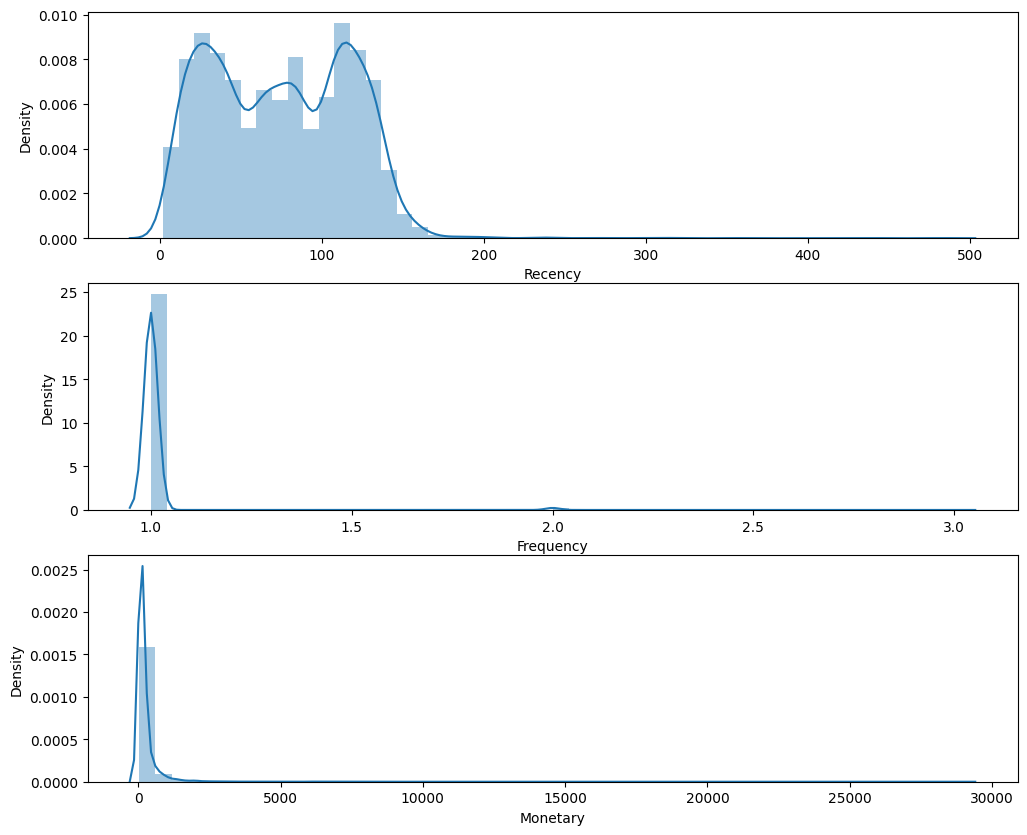

In [75]:
#@title 3.1 - RMF Analysis (histograma) - Criar widget

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(Olist_Cluster_RMF['df']['Recency'])
plt.subplot(3, 1, 2); sns.distplot(Olist_Cluster_RMF['df']['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(Olist_Cluster_RMF['df']['Monetary'])
plt.show()

In [57]:
#@title 3.1 - RMF Analysis - Distribuição de segmentos (ordenar)
plt.figure(figsize=(20,8))
#plt.rc('font', size=20)
per= sns.barplot(x=Olist_Cluster_RMF['estatistica']['Ratio'], y=Olist_Cluster_RMF['estatistica'].index, data=Olist_Cluster_RMF['estatistica'], palette="viridis")
sns.despine(bottom = True, left = True)
for i, v in enumerate(Olist_Cluster_RMF['estatistica']['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

TypeError: ignored

<Figure size 2000x800 with 0 Axes>

________________________________________________________________________________
## Gráficos

In [ ]:
#@title Compras por mês

def view_compras_por_mes(df, filtro_datas):
    if len(filtro_datas) != 2 or filtro_datas[0] is None or filtro_datas[1] is None or filtro_datas[0] > filtro_datas[1]:
      print('Selecione um período válido.')
      return

    hv.extension('bokeh')
    filtro = [pd.to_datetime(filtro_datas[0]), pd.to_datetime(filtro_datas[1])]

    df = pd.merge(df['orders'], df['order_items'], on="order_id")
    df = df[(df['order_purchase_timestamp'] >= filtro[0]) & (df['order_purchase_timestamp'] <= filtro[1])]
    vendas = df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M'))['price'].sum().reset_index()
    vendas['price_milhoes'] = vendas['price'] / 1000000

    calendario = pd.DataFrame({'order_purchase_timestamp': pd.date_range(start=filtro[0], end=filtro[1], freq='M')})
    vendas = calendario.merge(vendas, on='order_purchase_timestamp', how='left')
    vendas['price_milhoes'] = vendas['price_milhoes'].fillna(0)

    area = hv.Area(vendas, 'order_purchase_timestamp', 'price_milhoes').options(fill_alpha=0.3, color='blue')
    curve = hv.Curve(vendas, 'order_purchase_timestamp', 'price_milhoes').options(color='blue')
    vlines = hv.Overlay([hv.VLine(mes).options(line_color='lightgray', line_width=1, line_dash='dashed') for mes in vendas['order_purchase_timestamp']])

    area.opts(xlabel='Data', ylabel='Vendas (em milhões de reais)', title='Compras mensais da Olist')
    curve.opts(xlabel='Data', ylabel='Vendas (em milhões de reais)', title='Compras mensais da Olist')
    return (area * curve * vlines).options(height=400, width=800, ylim=(0, vendas['price_milhoes'].max()))


view_compras_por_mes(dataset, filtro_datas=['1-2016', '12-2018'])

In [ ]:
#@title Avaliações e Compras por mês

def view_compras_avaliacoes(dataset, filtro_datas):
    hv.extension('bokeh')

    df = dataset['order_reviews'].merge(dataset['order_items'], on="order_id").merge(dataset['order_payments'], on="order_id").merge(dataset['orders'], on="order_id")
    df = df[(df['order_purchase_timestamp'] >= filtro_datas[0]) & (df['order_purchase_timestamp'] <= filtro_datas[1])]

    # Agrupar dados por mês e avaliação
    vendas = df.groupby([pd.Grouper(key='order_purchase_timestamp', freq='M'), 'review_score'])['payment_value'].sum().reset_index()

    # Converter valores para milhões de reais
    vendas['price_milhoes'] = vendas['payment_value'] / 1000000

    # Formatando a coluna de datas para exibir apenas mês e ano
    vendas['order_purchase_timestamp'] = vendas['order_purchase_timestamp'].dt.strftime("%m/%y")

    # Criar gráfico de barras empilhadas
    bars = hv.Bars(vendas, ['order_purchase_timestamp', 'review_score'], 'price_milhoes').options(
        width=800, height=400, stacked=True, cmap='Spectral', legend_position='right'
    )
    bars.opts(xlabel='Data', ylabel='Vendas (em milhões de reais)', title='Vendas por avaliação da Olist')

    return bars


view_compras_avaliacoes(dataset, filtro_datas=['1-2016', '12-2018'])